# Background {data-stack-name="Background"}

## Outline

<div class="merck-blue-box" style="font-size: 1.1em;">

- **Background**
  - Sickle cell disease pathophysiology and unmet medical need.
  - Development funnel and assay design considerations.
  - Benefits and drawbacks of primary cell culture approach.

- **Assay Development**
  - Primary erythroid culture protocol optimization and automation
  - Nanostring and alphaLISA endpoint Z' achievement
  - Assay validation and troubleshooting

- **Reflections and Learnings**
  - Technical and analytical challenges encountered.
  - Key takeaways and broader applicability. 

</div>

## Molecular Biology of Hemoglobin Switching and Hemoglobin Types

:::: {.columns}

::: {.column width="30%"}
![](images/hbf.png){width=100%}

<div class="feature-card" style="margin-top: 0.5em; font-size: 0.9em; padding: 0.7em;">

**Therapeutic Strategy**

Reactivation of fetal hemoglobin (HbF) in adult red blood cells provides disease-modifying treatment for SCD.

</div>
:::

::: {.column width="70%"}
![](images/HBAvsHBF.png){width=75%}

<div style="font-size: 0.65em; color: #666; margin-top: 0.5em; font-style: italic; line-height: 1.3;">
A diagram illustrating hemoglobin switching in development. From Haemoglobin F, by sicklesense, 2014, sicklesense.
</div>
:::

::::


## Sickle Cell Disease: Unmet Medical Need

:::: {.columns}

::: {.column width="40%"}
![Sickle Cell Disease](images/Wan2.5-t2i-preview_00008_.png){width=90%}
:::

::: {.column width="60%"}
<div class="feature-card" style="font-size: 1.05em;">

**Disease Background**

- Single nucleotide mutation in β-globin gene (HBB)
- Polymerization of deoxygenated sickle hemoglobin (HbS)
- Vaso-occlusive crises, chronic hemolysis, organ damage
- ~100,000 patients in US; millions worldwide

</div>
:::

::::

## Assay Strategy & Design Rationale

<style>
.connector-container {
  position: relative;
}
.connector-line {
  position: absolute;
  height: 2px;
  background: linear-gradient(to right, #003087 0%, #003087 80%, transparent 100%);
  z-index: 1;
}
.line-1 { top: 15%; left: 55%; width: 5%; }
.line-2 { top: 35%; left: 55%; width: 5%; }
.line-3 { top: 55%; left: 55%; width: 5%; background: linear-gradient(to right, #FFD700 0%, #FFD700 80%, transparent 100%); height: 3px; }
.line-4 { top: 75%; left: 55%; width: 5%; }
</style>

<div class="connector-container">

:::: {.columns}

::: {.column width="55%"}
![](images/filefuntier.png){width=80%}
:::

::: {.column width="45%"}

<div class="feature-card" style="font-size: 0.85em; margin-bottom: 0.4em; padding: 0.6em;">

**Tier 1: High-Throughput Biochemical Screening**
TR-FRET Assay, LC/MS ect.

</div>

<div class="feature-card" style="font-size: 0.85em; margin-bottom: 0.4em; padding: 0.6em;">

**Tier 2: Target Engagement in vitro**
alphaLISA in immortalized cell line, limited treatment time

</div>

<div class="highlight-box" style="font-size: 0.9em; margin-bottom: 0.4em; padding: 0.6em; border: 3px solid #FFD700; background: rgba(255, 215, 0, 0.15);">

- **⭐ Tier 3: Physiological Relevant Phenotypic Confirmation ⭐**
  - Primary cell culture model
  - Nanostring gene expression
  - alphaLISA protein quantification
  - Built for screening ≈ 20 compounds weekly

</div>

<div class="status-card" style="font-size: 0.85em; margin-bottom: 0.4em; padding: 0.6em;">

**Tier 4: Candidate Selection**
3-5 candidates, in vivo testing

</div>

:::

::::

</div>

# Assay Development {data-stack-name="Assay Development"}

## Primary Erythroid Cell Culture Development

<style>
.workflow-container {
  display: grid;
  grid-template-columns: 1fr auto 1fr auto 1fr;
  align-items: center;
  gap: 0.6em;
  margin: 1em 0;
  font-size: 1em;
}

.workflow-step {
  text-align: center;
}

.workflow-arrow {
  font-size: 2.2em;
  color: #003087;
  font-weight: bold;
  text-align: center;
}

.workflow-image {
  background: white;
  padding: 0.6em;
  border-radius: 8px;
  box-shadow: 0 3px 5px rgba(0,48,135,0.1);
  margin: 0 auto;
}

.workflow-label {
  margin-top: 0.6em;
  font-size: 1.05em;
  font-weight: bold;
  color: #003087;
}

.workflow-details {
  margin-top: 0.4em;
  font-size: 0.8em;
  color: #2c2c2c;
  line-height: 1.3;
}

.loop-container {
  position: relative;
  padding: 0.6em;
}

.equipment-cycle {
  display: grid;
  grid-template-columns: repeat(3, 1fr);
  gap: 0.3em;
  margin-top: 0.5em;
  padding: 0.5em;
  background: linear-gradient(135deg, rgba(0, 48, 135, 0.08) 0%, rgba(0, 163, 181, 0.08) 100%);
  border-radius: 8px;
  border: 2px solid rgba(0, 48, 135, 0.2);
}

.equipment-item {
  text-align: center;
  padding: 0.4em;
  background: white;
  border-radius: 6px;
  box-shadow: 0 2px 4px rgba(0,48,135,0.1);
  position: relative;
}

.equipment-item::after {
  content: '→';
  position: absolute;
  right: -0.7em;
  top: 50%;
  transform: translateY(-50%);
  font-size: 1.2em;
  color: #003087;
}

.equipment-item:last-child::after {
  content: '';
}

.equipment-item img {
  height: 60px;
  object-fit: contain;
}

.equipment-name {
  font-size: 0.75em;
  color: #003087;
  margin-top: 0.3em;
  font-weight: bold;
}

.readout-box {
  background: white;
  padding: 0.6em;
  border-radius: 8px;
  box-shadow: 0 3px 5px rgba(0,48,135,0.1);
  margin: 0 auto;
  display: flex;
  justify-content: center;
  gap: 1em;
  align-items: center;
}

.platform-item {
  text-align: center;
}

.platform-item img {
  height: 60px;
  object-fit: contain;
  display: block;
  margin: 0 auto;
}

.platform-name {
  font-size: 0.75em;
  color: #003087;
  margin-top: 0.3em;
  font-weight: bold;
}
</style>

<div class="workflow-container">

<div class="workflow-step">
<div class="workflow-image">
![](images/2016/Flacon02.png){width=120px}
</div>
<div class="workflow-label">Phase 1: Expansion</div>
<div class="workflow-details">
Days -4 – 0<br/>
CD34+ cells<br/>
Recovery / Maintenance Medium
</div>
</div>

<div class="workflow-arrow">→</div>

<div class="workflow-step">
<div class="loop-container">

<div class="workflow-image">
![](images/2016/Puits01.png){width=120px}
</div>

<div class="workflow-label">Phase 2: Differentiation</div>
<div class="workflow-details">
Days 0 – 10<br/>
Compound addition<br/>
Cytokine cocktail addition for differentiation<br/>
96-well plates<br/>
Hemoglobin synthesis
</div>

<div class="equipment-cycle">
<div class="equipment-item">
![](images/celesta.png){height=50px}
<div class="equipment-name">Celesta<br/>Count</div>
</div>
<div class="equipment-item">
![](images/mantis.png){height=50px}
<div class="equipment-name">Mantis<br/>Normalize</div>
</div>
<div class="equipment-item">
![](images/viaflo.png){height=50px}
<div class="equipment-name">Viaflo<br/>Transfer</div>
</div>
</div>

</div>
</div>

<div class="workflow-arrow">→</div>

<div class="workflow-step">
<div class="readout-box">
<div class="platform-item">
![](images/nstring.png){height=50px}
<div class="platform-name">Nanostring<br/>nCounter</div>
</div>
<div class="platform-item">
![](images/envision.png){height=50px}
<div class="platform-name">EnVision<br/>alphaLISA</div>
</div>
</div>

<div class="workflow-label">Phase 3: Readout</div>
<div class="workflow-details">
Day 10<br/>
Cell harvest<br/>
Dual platform analysis
</div>

</div>

</div>

## Automation Implementation & Validation

<style>
.automation-grid {
  display: grid;
  grid-template-columns: repeat(3, 1fr);
  gap: 0.8em;
  margin: 0.5em 0;
}

.equipment-column {
  background: white;
  padding: 0.7em;
  border-radius: 6px;
  box-shadow: 0 2px 5px rgba(0,48,135,0.15);
  border: 2px solid rgba(0,48,135,0.2);
}

.equipment-header {
  text-align: center;
  margin-bottom: 0.5em;
  padding-bottom: 0.4em;
  border-bottom: 2px solid #003087;
}

.equipment-image-large {
  display: block;
  margin: 0 auto 0.3em auto;
  height: 65px;
  object-fit: contain;
}

.equipment-title {
  font-size: 0.95em;
  font-weight: bold;
  color: #003087;
  text-align: center;
}

.equipment-function {
  font-size: 0.75em;
  color: #76bc21;
  text-align: center;
  font-weight: bold;
  margin-top: 0.2em;
}

.equipment-details {
  margin-top: 0.4em;
  font-size: 0.7em;
  line-height: 1.25;
}

.detail-section {
  margin-bottom: 0.3em;
}

.detail-label {
  font-weight: bold;
  color: #003087;
  margin-bottom: 0.1em;
}

.detail-content {
  color: #2c2c2c;
}


</style>

<div style="position: relative;">

<div class="automation-grid">

<div class="equipment-column">
<div class="equipment-header">
<img src="images/celesta.png" class="equipment-image-large" />
<div class="equipment-title">BD Celesta</div>
<div class="equipment-function">Cell Count & Viability</div>
</div>

<div class="equipment-details">

<div class="detail-section">
<div class="detail-label">Purpose:</div>
<div class="detail-content">
Flow cytometry-based counting and viability
</div>
</div>

<div class="detail-section">
<div class="detail-label">Measures:</div>
<div class="detail-content">
Live cell density • Viability • Differentiation status
</div>
</div>

<div class="detail-section">
<div class="detail-label">Output:</div>
<div class="detail-content">
Auto-export well-by-well volumes to Mantis for normalization
</div>
</div>

</div>
</div>

<div class="equipment-column">
<div class="equipment-header">
<img src="images/mantis.png" class="equipment-image-large" />
<div class="equipment-title">Formulatrix Mantis</div>
<div class="equipment-function">Cell Normalization</div>
</div>

<div class="equipment-details">

<div class="detail-section">
<div class="detail-label">Purpose:</div>
<div class="detail-content">
Individual dispensing of discreet volumes by well. 
</div>
</div>

<div class="detail-section">
<div class="detail-label">Notes:</div>
<div class="detail-content">
Set up in tissue culture hood to ensure sterility. 
</div>
</div>

<div class="detail-section">
<div class="detail-label">Impact:</div>
<div class="detail-content">
Eliminates pipetting errors, enables throughput scaling
</div>
</div>

</div>
</div>

<div class="equipment-column">
<div class="equipment-header">
<img src="images/viaflo.png" class="equipment-image-large" />
<div class="equipment-title">Integra Viaflo</div>
<div class="equipment-function">Plate Transfer</div>
</div>

<div class="equipment-details">

<div class="detail-section">
<div class="detail-label">Purpose:</div>
<div class="detail-content">
96-channel cell transfer to new mantis setup plate, compound dosing
</div>
</div>

<div class="detail-section">
<div class="detail-label">Applications:</div>
<div class="detail-content">
Cell transfer • Media exchanges • Compound dosing • Fits in Tissue Culture Hood
</div>
</div>

<div class="detail-section">
<div class="detail-label">Benefit:</div>
<div class="detail-content">
10× faster than manual; reduces contamination risk
</div>
</div>

</div>
</div>

</div>

</div>

<div class="highlight-box" style="margin-top: 0.5em; text-align: center; font-size: 0.8em; padding: 0.3em;">

**Automation Impact:** Processing time 6h → 90min per batch

</div>

## Cell Viability Analysis

![](images/viabilityplot.png){width=90%}


## Assay Endpoints & Data Capture {auto-animate="true"}

:::: {.columns}

::: {.column width="50%"}
<div class="merck-blue-box" style="font-size: 0.85em; padding: 0.5em;">

**Nanostring nCounter Gene Expression**

</div>

<img data-id="nano-img" src="images/nano.png" style="width: 450px; margin: 2em auto 0 auto; display: block;" />
:::

::: {.column width="50%"}
<div class="merck-blue-box" style="font-size: 0.85em; padding: 0.5em;">

**alphaLISA Protein Quantification**

</div>

<img data-id="alpha-img" src="images/alphaLISA.png" style="width: 450px; margin: 2em auto 0 auto; display: block;" />
:::

::::

## Assay Endpoints & Data Capture {auto-animate="true"}

:::: {.columns}

::: {.column width="50%"}
<div class="merck-blue-box" style="font-size: 0.85em; padding: 0.5em;">

**Nanostring nCounter Gene Expression**

</div>

<div class="feature-card" style="margin-top: 0.6em; font-size: 0.60em; padding: 0.5em; line-height: 1.3; position: relative;">

<img data-id="nano-img" src="images/nano.png" style="float: left; width: 200px; margin-right: 1em; margin-bottom: 0.6em;" />

- **Plexset with 12 gene panel including:**
  - **HBG1/HBG2:** Fetal γ-globin mRNA.
  - **HBA:** Total hemoglobin expression mRNA.
  - **HBB:** Adult ß-expression mRNA.


- **Data Output:**
  - Digital counts, normalized to housekeeping genes.
  - Fold-change vs vehicle control.

</div>
:::

::: {.column width="50%"}
<div class="merck-blue-box" style="font-size: 0.85em; padding: 0.5em;">

**alphaLISA Protein Quantification**

</div>

<div class="feature-card" style="margin-top: 0.6em; font-size: 0.70em; padding: 0.5em; line-height: 1.3; position: relative;">

<img data-id="alpha-img" src="images/alphaLISA.png" style="float: left; width: 200px; margin-right: 1em; margin-bottom: 0.6em;" />

- **Protein readout:**
  - **HbF Protein:** Direct fetal hemoglobin measurement.
  - **Clinically relevant endpoint:** Comparable to goldstandard HPLC readout.

- **Data Output:**
  - Absolute protein concentration.

</div>
:::

::::

<div class="highlight-box" style="margin-top: 0.6em; text-align: center; font-size: 0.8em; padding: 0.4em;">

**Dual-platform approach:** mRNA mechanistic insights + clinically relevant protein endpoints

</div>

## Assay Development Criteria: Production Readiness Checklist

<div class="merck-blue-box" style="margin-bottom: 0.5em; padding: 0.4em; font-size: 0.9em;">

**Assay Development Standards**

</div>

<div style="font-size: 0.95em; line-height: 1.5;">

- **Performance:** Z' ≥0.5 | S/B ≥3 | CV% <20%
- **Reproducibility:** Validated across operators & reagent lots
- **Validation:** Dose-response, EC₅₀/IC₅₀, dynamic range
- **Interference:** Plate effects, DMSO, matrix effects
- **Operations:** SOP, data pipeline, throughput

</div>

<div class="highlight-box" style="margin-top: 0.5em; padding: 0.4em; text-align: center; font-size: 0.95em;">

**Status: Qualified for Production Screening**

</div>

## Assay Validation: Tool Compounds

:::: {.columns}

::: {.column width="20%"}

<div style="padding: 0.5em; background: rgba(0, 48, 135, 0.05); border-radius: 4px; margin-bottom: 0.4em; font-size: 0.8em; line-height: 1.4;">

**Assay Robustness**

- **Z' Factor:** <span style="color: #76bc21; font-weight: bold;">0.82</span> ✓
- **CV%:** <span style="color: #76bc21; font-weight: bold;">8.2%</span> ✓
- **Data Quality:** <span style="color: #76bc21; font-weight: bold;">99.2%</span>

</div>

<div style="padding: 0.5em; background: rgba(0, 48, 135, 0.05); border-radius: 4px; font-size: 0.8em; line-height: 1.4;">

**Performance**

- **Signal-to-Background:** <span style="color: #00a3b5; font-weight: bold;">95%</span>
- **Dynamic Ratio:** <span style="color: #00a3b5; font-weight: bold;">12.5</span>
- **Throughput:** <span style="color: #00a3b5; font-weight: bold;">3,840/week</span>

</div>

:::

::: {.column width="80%"}

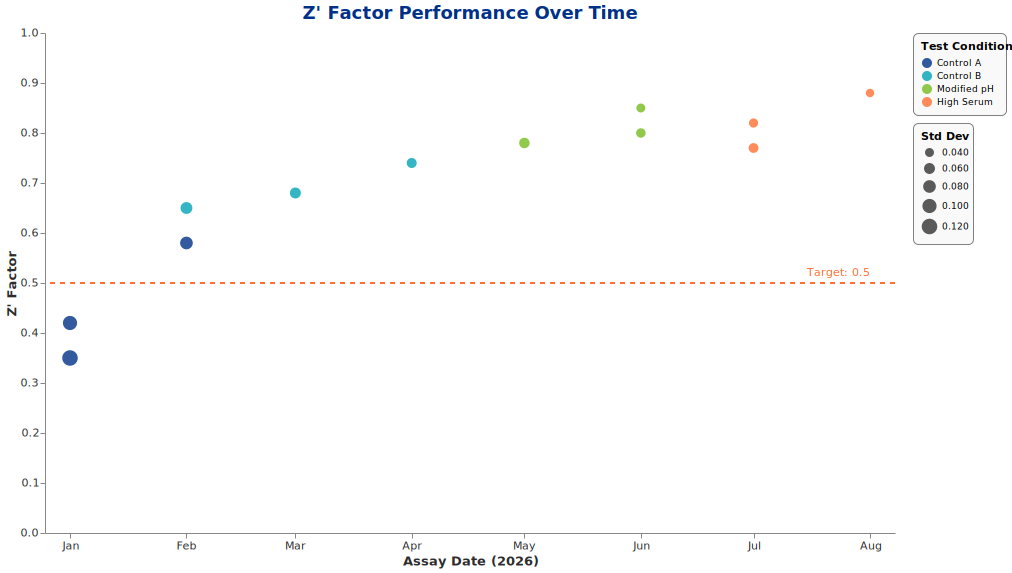

In [3]:
import pandas as pd
import numpy as np
import altair as alt

# Create sample data with ELN links
qc_data = pd.DataFrame({
    'date': pd.to_datetime([
        '2024-01-15', '2024-01-28', '2024-02-12', '2024-02-25',
        '2024-03-10', '2024-04-05', '2024-05-08', '2024-06-03',
        '2024-06-20', '2024-07-02', '2024-07-18', '2024-08-05'
    ]),
    'z_prime': [0.35, 0.42, 0.58, 0.65, 0.68, 0.74, 0.78, 0.80,
                0.85, 0.77, 0.82, 0.88],
    'std_dev': [0.12, 0.10, 0.08, 0.07, 0.06, 0.05, 0.055, 0.045,
                0.040, 0.048, 0.042, 0.035],
    'assay_id': ['ASY-001', 'ASY-002', 'ASY-003', 'ASY-004',
                 'ASY-005', 'ASY-006', 'ASY-007', 'ASY-008',
                 'ASY-009', 'ASY-010', 'ASY-011', 'ASY-012'],
    'test_condition': ['Control A', 'Control A', 'Control A', 'Control B',
                       'Control B', 'Control B', 'Modified pH', 'Modified pH',
                       'Modified pH', 'High Serum', 'High Serum', 'High Serum'],
    'eln_url': [f'https://demo.elabftw.net/experiments.php?mode=view&id={i}' for i in range(1, 13)]
})

# Format date for display
qc_data['date_label'] = qc_data['date'].dt.strftime('%b %d')

# Create color scale based on Z' factor value
qc_data['status'] = qc_data['z_prime'].apply(
    lambda x: 'Excellent' if x >= 0.7 else ('Good' if x >= 0.5 else 'Below Target')
)

# Create the interactive Altair chart
base = alt.Chart(qc_data).encode(
    x=alt.X('yearmonth(date):T', 
            scale=alt.Scale(padding=25),
            axis=alt.Axis(title='Assay Date (2026)', 
                         format='%b',
                         titleFontSize=13,
                         titleFontWeight='bold',
                         titleColor='#2c2c2c',
                         labelFontSize=11,
                         labelColor='#2c2c2c',
                         grid=False)),
    y=alt.Y('z_prime:Q', 
            scale=alt.Scale(domain=[0, 1]),
            axis=alt.Axis(title="Z' Factor",
                         titleFontSize=13,
                         titleFontWeight='bold',
                         titleColor='#2c2c2c',
                         labelFontSize=11,
                         labelColor='#2c2c2c',
                         grid=False)),
    color=alt.Color('test_condition:N',
                   scale=alt.Scale(domain=['Control A', 'Control B', 'Modified pH', 'High Serum'],
                                 range=['#003087', '#00a3b5', '#76bc21', '#ff6f31']),
                   legend=alt.Legend(
                       title='Test Condition',
                       titleFontSize=11,
                       titleFontWeight='bold',
                       labelFontSize=9,
                       orient='right',
                       direction='vertical'
                   )),
    size=alt.Size('std_dev:Q',
                 scale=alt.Scale(domain=[0.03, 0.12], range=[60, 240]),
                 legend=alt.Legend(
                     title='Std Dev',
                     titleFontSize=11,
                     titleFontWeight='bold',
                     labelFontSize=9,
                     orient='right',
                     direction='vertical',
                     format='.3f'
                 )),
    href='eln_url:N',
    tooltip=[
        alt.Tooltip('date_label:N', title='Date'),
        alt.Tooltip('z_prime:Q', title="Z' Factor", format='.2f'),
        alt.Tooltip('std_dev:Q', title='Std Dev', format='.3f'),
        alt.Tooltip('test_condition:N', title='Test Condition'),
        alt.Tooltip('assay_id:N', title='Assay ID'),
        alt.Tooltip('status:N', title='Status')
    ]
)

# Points layer with interactivity
points = base.mark_circle(opacity=0.8, cursor='pointer')

# Target line
target_line = alt.Chart(pd.DataFrame({'y': [0.5]})).mark_rule(
    strokeDash=[5, 5],
    color='#ff6f31',
    size=2
).encode(y='y:Q')

# Target label
target_text = alt.Chart(pd.DataFrame({
    'x': [qc_data['date'].max()],
    'y': [0.52],
    'text': ['Target: 0.5']
})).mark_text(
    align='right',
    color='#ff6f31',
    fontSize=11
).encode(
    x='yearmonth(x):T',
    y='y:Q',
    text='text:N'
)

# Combine layers
chart = (points + target_line + target_text).properties(
    width=850,
    height=500,
    title=alt.TitleParams(
        text="Z' Factor Performance Over Time",
        fontSize=18,
        fontWeight='bold',
        color='#003087',
        anchor='middle'
    )
).configure_view(
    strokeWidth=0
).configure_axis(
    grid=False
).configure_legend(
    strokeColor='gray',
    fillColor='#f9f9f9',
    padding=8,
    cornerRadius=5
)

# Enable SVG rendering
alt.renderers.enable('svg')
chart

:::

::::

## Analysis Pipeline Development

<style>
.pipeline-container {
  display: grid;
  grid-template-columns: 1fr 1fr 1fr;
  align-items: center;
  gap: 2em;
  margin: 2em 0;
  position: relative;
}

.pipeline-item {
  text-align: center;
  position: relative;
}

.pipeline-arrow {
  position: absolute;
  font-size: 3em;
  color: #003087;
  font-weight: bold;
}

.arrow-up {
  top: -30%;
  left: 95%;
  transform: translateX(-50%) rotate(-20deg);
}

.arrow-down {
  bottom: -30%;
  left: 95%;
  transform: translateX(-50%) rotate(20deg);
}

.arrow-right-top {
  top: 20%;
  right: -50%;
  transform: translateX(-50%) rotate(20deg);
}

.arrow-right-bottom {
  bottom: 20%;
  right: -50%;
  transform: translateX(-50%) rotate(-20deg);
}
</style>

<div class="pipeline-container">

<div class="pipeline-item">
<img src="images/nsolversoft.png" style="width: 250px; height: auto;" />

<div class="pipeline-arrow arrow-up">→</div>
<div class="pipeline-arrow arrow-down">→</div>
</div>

<div class="pipeline-item">
<div style="margin-bottom: 1em;">
<iframe src="https://java-decompiler.github.io/" style="width: 100%; height: 300px; border: 2px solid #003087; border-radius: 8px;"></iframe>
</div>

<div class="pipeline-arrow arrow-right-top">→</div>

<div style="margin-top: 2em;">
<img src="images/noun-documentation.svg" style="width: 150px; height: auto;" />
</div>

<div class="pipeline-arrow arrow-right-bottom">→</div>
</div>

<div class="pipeline-item">
<img src="images/Python-logo-notext.png" style="width: 200px; height: auto;" />
</div>

</div>

# Reflections and Learnings {data-stack-name="Reflections and Learnings"}

## Challenges & Solutions

:::: {.columns}

::: {.column width="50%"}
<div class="feature-card" style="font-size: 0.9em; padding: 0.7em;">

**Technical Challenges**

**1. Donor Variability:** 3-5 fold baseline HbF differences
- *Solution:* Normalized metrics; qualified donor panel

**2. Culture Reproducibility:** Batch-to-batch variation
- *Solution:* Lot testing; controlled serum batches

**3. Throughput Limitations:** Manual culture steps
- *Solution:* Semi-automation; batch processing

</div>
:::

::: {.column width="50%"}
<div class="feature-card" style="font-size: 0.9em; padding: 0.7em;">

**Analytical Challenges**

**4. Nanostring Throughput:** 12-24 samples/run limitation
- *Solution:* Prioritized compounds; alphaLISA primary

**5. Data Integration:** Correlating mRNA and protein
- *Solution:* Custom pipeline; unified database

**6. Assay Interference:** Autofluorescence from compounds
- *Solution:* AlphaLISA format immune to interference

</div>
:::

::::

## Key Takeaways & Impact

<div class="merck-blue-box" style="margin-bottom: 1em; font-size: 1.05em; padding: 0.6em;">

**Primary Accomplishments**

</div>

:::: {.columns}

::: {.column width="50%"}
<div class="feature-card" style="font-size: 1em; padding: 0.8em;">

**Assay Development**

✓ Established robust primary cell culture system (Z' >0.7)

✓ Implemented dual-readout platform (Nanostring + alphaLISA)

✓ Validated with clinical and tool compounds

✓ Achieved screening throughput capability

✓ Generated mechanistic insight framework

</div>
:::

::: {.column width="50%"}
<div class="feature-card" style="font-size: 1em; padding: 0.8em;">

**Drug Discovery Impact**

✓ Supported 3 lead optimization campaigns

✓ Screened >2,500 compounds over 18 months

✓ Identified novel chemical series with <100 nM potency

✓ Enabled mechanism-based compound classification

✓ Informed candidate selection for in vivo studies

</div>
:::

::::

<div class="status-card" style="margin-top: 1em; font-size: 1em; padding: 0.7em;">

**Scientific Contribution:** Physiologically relevant, translational assay bridging medicinal chemistry and clinical development for sickle cell disease therapeutics

</div>

## Acknowledgments

:::: {.columns}

::: {.column width="50%"}
<div class="feature-card" style="font-size: 1em; padding: 0.8em;">

**Collaborators & Contributors**

**Biology Team:**
- Primary cell culture development
- Assay validation & execution
- Data analysis & interpretation

**Chemistry Team:**
- Compound synthesis & SAR
- Lead optimization campaigns

**Translational Sciences:**
- Clinical sample coordination
- Biomarker strategy

</div>
:::

::: {.column width="50%"}
<div class="feature-card" style="font-size: 1em; padding: 0.8em;">

**Technical Support**

**Core Facilities:**
- Nanostring nCounter operations
- Flow cytometry core
- Automation support

**External Partners:**
- SCD patient advocacy groups
- Clinical material suppliers
- Technology vendors

</div>
:::

::::

<div class="highlight-box" style="margin-top: 1em; text-align: center; font-size: 1.2em; padding: 0.7em;">

**Questions?**

</div>

## Backup Slides

<div class="merck-blue-box" style="text-align: center; padding: 2em; font-size: 1.5em;">

**Supplementary Data & Technical Details**

</div>


## Nanostring nCounter Background


:::: {.columns}
::: {.column width="55%"}
<div class="merck-blue-box" style="font-size: 1.05em; padding: 0.6em;">

**Technology Overview**

Digital molecular barcoding for direct mRNA quantification without amplification

</div>

<div class="feature-card" style="margin-top: 1em; font-size: 1em; padding: 0.8em;">

**Custom CodeSet Design**

- **Target Genes:** HBG1, HBG2 (γ-globin), HBB, HBA1/2
- **Hemoglobin Switching:** BCL11A, KLF1, MYB, SOX6
- **Erythroid Markers:** GATA1, TAL1, EPOR
- **Housekeeping:** GAPDH, ACTB, HPRT1
- **Total:** 15-20 genes per panel

</div>
:::

::: {.column width="45%"}
<div class="status-card" style="font-size: 0.95em; padding: 0.7em;">

**Workflow Implementation**

1. Cell lysis & mRNA isolation
2. Hybridization with probe sets (16-18 hrs)
3. Nanostring nCounter detection
4. Digital counting & normalization
5. Data analysis pipeline

**Throughput:** 12-24 samples per run

**Turnaround:** 48 hours

</div>

<div class="highlight-box" style="margin-top: 1em; font-size: 1em; padding: 0.6em;">

**Key Advantage:** Minimal sample input (100 ng RNA)

</div>
:::

::::